# Linear Models

Acts:

* Structure of a linear model
* Ordinary Lease Squares (OLS) regression
* Quantifying error in your parameter estimates
* Regression vs. traditional test statistics

This lecture draws from Chapter 3 of James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

---
# 1. Structure of a linear model

In the last lecture we discussed the general form of all test statistics.

$$ Y = f(X) + \epsilon $$

Linear models, or linear regression models, assume a particular form of $f()$ such that it is linear and additive. This means that the assumed structure $f()$ is:

$$ Y = \beta_0 + \beta_1x_1 + ... + \beta_px_p $$

In many cases we also use the linear algebra notation, with the regression coefficients ($b_0, b_1,$ etc.) represented as a $1 \times p$ vector ($ \beta $) and predictor variables ($X$) represented as an $n \times p$ matrix. Thus,

$$ Y = f(X) = X \beta $$

Sometimes we call X the _design matrix_. This term will pop up time and again as we go along.

<br>

---
## Assumptions of univariate linear models

The normal form of ordinary least squares regression is characterized by 4 assumptions:

1. $Y$ is *normally distributed*.
2. $f(X)$ describes a *linear* relationship between $X$ & $Y$.
3. There is *no collinearity* in the different variables of $X$.
4. $f(X)$ is *stationary*, such that the observation of one data pair, $<x_n, y_n>$ does not affect the relationship of another data pair, $<x_{n+1}, y_{n+1}>$.

Any violation of these assumptions can dramatically impact the _interpretability_ of your estimated $f(X)$. 

<br>

---
## Example



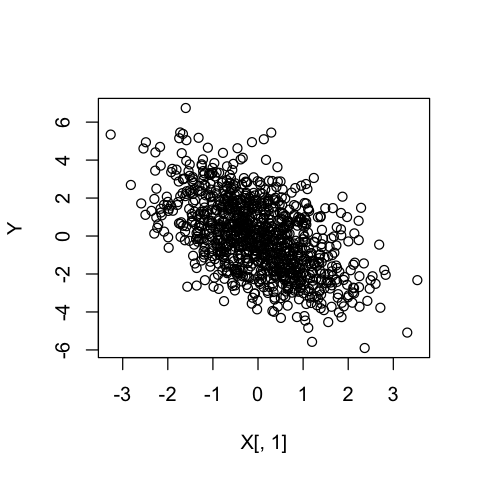

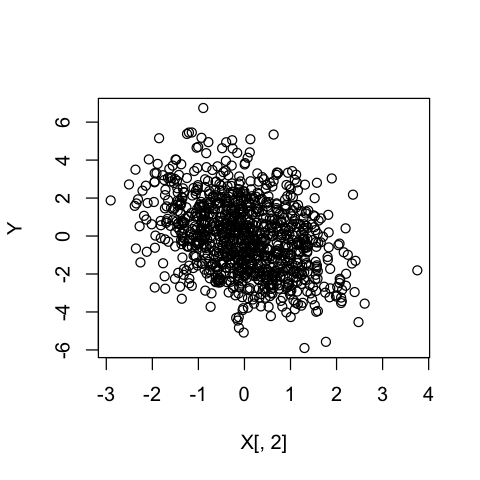

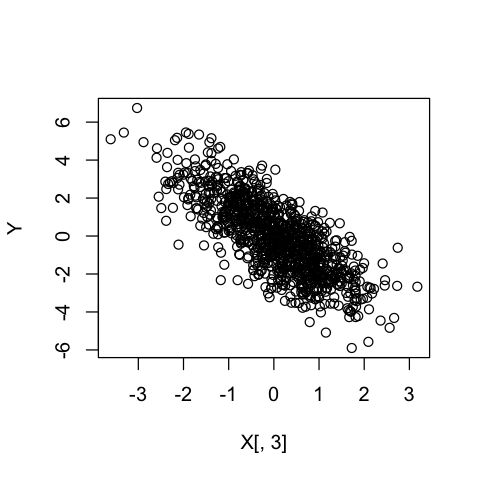

In [32]:
# Restrict plotting dimensions
options(repr.plot.width=4, repr.plot.height=4)

# Here we will simulate a simple linear system and visualize it.
n = 1000
p = 3

# Let's simulate the simple linear system
X = matrix(rnorm(n*p), nrow=n, ncol=p) # X is n x p matrix
B = rnorm(p); # B is 1 x p
Y = X %*% B # Y is a linear sum

# Show how Y covaries with each X variable
plot(X[,1],Y)
plot(X[,2],Y)
plot(X[,3],Y)




Notice that the relationship is simple. The  coefficients in the vector $\beta$ determine how each variable in $X$ covaries with $Y$. In this example we are showing the "ground truth" (i.e., the exact coefficients that determine $Y$). The trick in regression modeling is finding the best _estimation_ of the real $\beta$. From here on out we will use the term $\hat{\beta}$ to describe the estimated set of regression coefficients.

---
# Ordinary Least Squares (OLS) Regression

When fitting $\hat{\beta}$, one of the most common (and computationally efficient) approaches is the Ordinary Least Squares (OLS) solution. In order to understand how OLS works, it's first important to define the concept of a _cost function_.

<br>
* **Cost Function:** Also known as a "loss function" it is a function that needs to be minimized such that the lowest possible value indicates the best possible outcome.

<br>
In the case of all regression models, for each obsevation $i$, model error in predicting it is described by the _residual error_ ($e_i$), which is the difference between the observed ($y$) and predicted ($\hat{y}$) values. 

$$ e_i = y_i - \hat{y_i} $$

The residual error is essentially the distance between each real observation and the regression line, shown as the verticle bars in the plot below.

![Residuals](imgs/L7Residual.png)

Now the goal is to get this residual error as small as possible. In this case, the cost function for OLS is the _residual sum squared (RSS) error_. 

$$ RSS = e_1^2 + ... e_n^2 = (y_1 - \hat{b}_0 - \hat{b}_1x_1) + ... + (y_n - \hat{b}_0 - \hat{b}_1x_n) $$

This example of the RSS assumes that there is only a single predictor variable (i.e. p = 1), but the principle holds for when $X$ has more than one variable. We will keep p = 1 for right now for the sake of simplicity.

---

Since the RSS is a cost function, the goal is to minimize it. For the case where p = 1 (i.e., you only need to fit a slope ($\beta_0$) and intercept ($\beta_1$) term), that function looks like this.

![Cost Landscape](imgs/L7RSSLandscape.png)

It turns out that the elegance of OLS regression is that there is a _closed form_ solution to finding the best fitting values for $\hat{\beta}$. This means that finding the best regression coefficients to fit your data reduces to simple algebra. 

 $$ \hat{\beta}_1 = \frac{ \sum_{i=1}^{n} (x_i-\bar{x})(y_i - \bar{y})} {\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

These two equations produce **the best fitting line that minimizes the RSS**. The elegance of this approach is that there is a single, unique solution to the cost space that minimizes the _reducible error_.

<br>

---

The OLS solution as presented above is clear to see when p = 1, but you can easily see where things get messy (visually speaking) when trying to write out the equations when p > 1. In this case, it's easier to view the solution using matrix notation instead. Here the OLS solution looks like this.

$$ \hat{\beta} = (X'X)^{-1}X'Y $$

The $(X'X)^{-1}$ means it is the inverse of the square X'X matrix (remember inverting a matrix means that $AA^{-1}=I$, where $I$ is the [_identity matrix_](https://en.wikipedia.org/wiki/Identity_matrix)).

In this form, the OLS solution is easy to solve for any X with p > 1 dimensions.

<br>

---
Let us illustrate the beauty of this solution by example. Consider the data we simulated above (i.e., where we know the true values)

In [40]:
# Find the OLS solution to the simulated data above
# First lets spit out the actual regression coefficients used to generate the data
B

-1.027685,-0.7125757,-1.473126


In [41]:
# Now let's apply the OLS solution shown above. 

# Two things first:
# solve(A) returns the inverse of the square matrix A
# t(A) returns the transpose of the matrix A
B_hat = solve(t(X) %*% X) %*% t(X) %*% Y
B_hat

-1.0276854
-0.7125757
-1.4731257


Notice how we can recover the real values used to generate the data shown in the example above (Although when you work through the logic, it turns out not to be that surprising. We will return to this in the next lecture).

(**Note:** Later in the course we will go over specific tools in r, such as the _lm_ and _glm_ functions, that also solves this problem, and more complicated problems.)

---
# 3. Quantifying error in the OLS model

So far we have shown (but not proven) how you can recover the OLS solution to a simple linear regression problem. A corollary question is determining how certain you are that the parameter you estimated is correct.

For this we'll need to estimate the _residual standard error_.

* **Residual Standard Error (RSE):** A variance estimate of the residual error, defined as

$$ RSE = \sigma_{model}^2 = \sqrt{ \frac{RSS}{n-2} } $$

What the RSE really tells us is the certainty on the residual error estimate from our model. If we go back to the simple regression model, where p = 1, then it is easy to show how the RSE allows for us to estimate our confidence on our parameters.

$$ SE(\hat{\beta}_0) = \sigma_{model}^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}] $$

$$ SE(\hat{\beta}_1) = \frac{\sigma_{model}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2} $$

---
Before we go any further it is probably a good time to clarify the distinction between _standard deviation_ and _standard error_, as this will be important for interpreting $SE(\hat{\beta})$. 

* **Standard Deviation ($\sigma$):** A quantification of the dispersion of the data. 

$$ \sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 } = \sqrt{\sigma^2}$$

* **Standard Error (SE):** A quantification of the accuracy of a parameter.

$$ SE = \sqrt{ \frac{\sigma^2}{n} } = \frac{\sigma}{\sqrt{n}} $$

Thus a _standard deviation_ describes the characteristics of a distribution while the _standard error_ simply tells you how confident you are that the parameter you estimated is correct.

---

Returning to our estimation of model confidence, we now can see that the [95% confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) of any model parameter $\hat{\beta}_i$ is 

$$ \hat{\beta}_i \pm 1.96 \cdot SE(\hat{\beta}_i) $$


---
# 4. Regression vs. traditional test statistics

Linear regression is one of the most powerful tools you will ever work with. This is because most questions that you can address with specialized test statistics can also be answered using linear regression. Here we will explore some examples of this utility of regression.

<br>

---
## T-tests

Let's say that you wanted to look for group differences in a physiological measure of stress reactivity between children exposed to pictures of snakes and those exposed to pictures of bunnies. In this case your data table would be organized in this way.

<br>

| Subject ID | Picture    | Response |
| -----------|:----------:| ------:|
| s001       | snake      |  1600 |
| s002       | bunny      |    12 |
| s003       | snake      |   874 |
| s004       | bunny      |    33 |

Your null hypothesis ($H_0$) is that the mean response is not different between groups, while your research hypothesis ($H_r$) is that the means response is higher in the children shown pictures of snakes.

<br>
The t-test for this would be:

$$ t = \frac{\bar{x}_{snakes} - \bar{x}_{bunnies}}{s_{\bar{x}_{snakes} - \bar{x}_{bunnies}}} $$

where

$$ s_{\bar{x}_{snakes} - \bar{x}_{bunnies}} = \sqrt{ \frac{\sigma_{snakes}^2}{n_{snakes}} + \frac{\sigma_{bunnies}^2}{n_{bunnies}} } $$

<br>
This this is simple enough, but you can do the same thing with OLS. First we'll want to recode the data table so that there are _dummy variables_ (i.e., binary indicator variables) for each of the  conditions. 

| Subject ID |  Response | Snake | Bunny | 
| -----------|:---------:|------:|------:|
| s001       |   1600    |   1   |   0   |  
| s002       |     12    |   0   |   1   |  
| s003       |    874    |   1   |   0   |   
| s004       |     33    |   0   |   1   |   


Now we can estiamte the impact of each condition according to the regression model.

$$ Y_{response} = \hat{\beta}_{snakes} X_{snakes} +  \hat{\beta}_{bunnies} X_{bunnies} + \hat{\beta}_0 $$

For simplicity sake, $\hat{\beta}_0 = 0$ here. 

Once we've fit the parameters, we can perform the exact same t-test calculation, but now as

$$ t = \frac{\hat{\beta}_{snakes} - \hat{\beta}_{bunnies}} {SE(\hat{\beta}_{snakes} - \hat{\beta}_{bunnies})} $$

This returns a t-test statistic telling you the significance of the group difference. 

---
## ANOVA

Another very popular test statistic is the [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance), which is used in cases that t-tests wont fail (i.e., when you have more than 2 conditions). ANOVAs are _omnibus_ tests, meaning that they can test for differences between levels and conditions, but they cannot tell you the direction of those differences. This is the reason most researchers use post-hoc statistics, like pairwise t-statistics, after identifying a specific main effect or interaction.

With regression you can test the same hypotheses as what you can with ANOVA, but computationally more efficiently and with the _ability to infer directionality in your relationships_.

Consider the symmetry between a simple one-way ANOVA (i.e., one condition with multiple levels) and OLS regression. In this case, let's say that we have  three groups of children: kids shown pictures of snakes, kids shown pictures of bunnies, and kids shown pictures of clowns. In this case the data table is organized the same, just with a new level in the Picture column.


| Subject ID | Picture    | Response |
| -----------|:----------:| ------:|
| s001       | snake      |  1600 |
| s002       | bunny      |    12 |
| s003       | clown      |  3874 |
| s004       | snake      |  1333 |

Now the traditional ANOVA (aka- F-statistic) looks at the ratio of the _between group variance_ to the _within group variance_. Here we identify the number of levels (i.e., categories of pictures) as $k$. 

$$ F = \frac{\sigma_{between}^2}{\sigma_{within}^2} = \frac{ \sum_{i=1}^{k} \frac{n_i(y_i - \bar{y})^2}{K-1}} {\frac{ \sum_{i=1}^{k} \sum_{j=1}^{n_i} (y_{i,j} - \bar{y}_i)^2 } {N-K} }  $$

If F >> 1, then it's a good indication that you have a main effect of picture on the physiological stress responses. However, calculating these residual sums of squares is computationally expensive (since there's not a clean way of doing this in a matrix form). In addition, it just tells you that there is, somewhere in the data, a relationship, but not where.

Now let's consider the same question, but reframed as a regression problem. Again we will need to change the data table so that there are _dummy variables_ for each of the three conditions. 

| Subject ID |  Response | Snake | Bunny | Clown |
| -----------|:---------:|------:|------:|------:|
| s001       |   1600    |   1   |   0   |   0   |
| s002       |     12    |   0   |   1   |   0   |
| s003       |   3874    |   0   |   0   |   1   |
| s004       |   1333    |   1   |   0   |   0   |

Thus you now have a regression model where p = 3. 

$$ f(x) =  \beta_1x_{snake} + \beta_2 x_{bunny} + \beta_3 x_{clown} $$

After we fit the regression coefficients $\hat{\beta}$ for this model using OLS, we can directly calculate the F-statistic using two cost functions from the model: residual sums of squares (RSS; same as described above) and total sums of squarees (TSS). 

$$ RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
$$ TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

Note that here, $\hat{y}_i$ is the model prediction. So for i = 1, it is 

$$ \hat{y}_1 = \beta_1 1 + \beta_2 0 + \beta_3 0 = \beta_1 $$

With these cost functions, we can calculate the same F-statistic.

$$ F = \frac{ \frac{(TSS-RSS)}{p}} { \frac{RSS}{n - p - 1}} $$

This way of setting up the F-statistic is saying the same thing as the traditional ANOVA: _if the residual error not explained by your model (TSS) is greater than the residual error explained by your model (RSS), then the ratio is high._

But notice something important. When you estimated the regression model, the coefficients themselves are meaningful (e.g., $\beta_1$ tells you the mean effect of showing a snake picture on the stress response). So along with estimating the omnibus effect with the F-statistics, you also get the directions of the effects in the same model estimation step.

<br>

--- 
## Correlations

The traditional (Pearsons) [correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) looks at how two variables, $X$ and $Y$, _covary_ together. The traditional form of this statistic is

$$ r = \frac{cov(x,y)}{\sigma_x \sigma_y} = \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) } { \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2}  } $$

It turns out that, when your data are _standard normal_ (i.e., that $X$ & $Y$ have $\mu=0$ and $\sigma=1$), then the regression coefficients that you get from OLS regression _are the correlation coefficients_. 

$$ \hat{\beta} =\frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) } { \sqrt{ \sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^{n} (y_i - \bar{y})^2}} $$

I will go into how this symmetry between regression and correlation coefficients in the next lecture.
